In [1]:
import pandas as pd
import numpy as np

In [9]:
HeartData = pd.read_csv('./heart.csv')
HeartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
#get the features in X and store the target column in y .
X = HeartData.iloc[:, :-1]

#extract the target column.
y = HeartData["target"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
from sklearn.preprocessing import StandardScaler
#we can use a transformer to scale our data
transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth = 4,random_state = 0)
clf3 = RandomForestClassifier(n_estimators=100,random_state=0)

In [17]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test) #Clf 2 is the decision tree model
y_pred3=clf3.predict(X_test)

/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


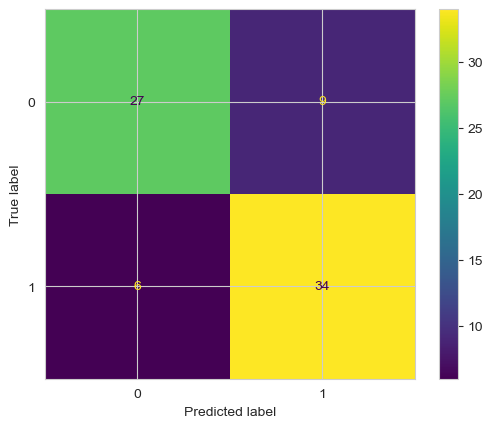

In [18]:
target_names = ['No_heart_problem', 'heart_disease']
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred2)
#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2, X_test, y_test)

In [20]:
print(classification_report(y_test, y_pred2, target_names=target_names))

                  precision    recall  f1-score   support

No_heart_problem       0.82      0.75      0.78        36
   heart_disease       0.79      0.85      0.82        40

        accuracy                           0.80        76
       macro avg       0.80      0.80      0.80        76
    weighted avg       0.80      0.80      0.80        76



In [22]:
accuracy_score(y_test,y_pred2)

0.8026315789473685

In [23]:
accuracy_score(y_test,y_pred1)

0.8289473684210527

In [24]:
accuracy_score(y_test,y_pred3)

0.8421052631578947